In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import miepython
from concurrent import futures
import os

In [4]:
def n(lambda0,coef1=0.010658,coef2=-0.007186):
    """
    args: 
        lambda (float)(nm) 
        coef1,coef2: parameter for exp
    returns:
        n 複素屈折率の虚部

    """
    return coef1*np.exp(coef2*lambda0)

result = []

#for lambda0 in lambda0:


def scattering_for_eachAngle(theta):
    cos = np.cos(np.radians(theta))
    sin = np.sin(np.radians(theta))

    S1,S2 = miepython.mie_S1_S2(m,x,cos,norm="wiscombe")
    i1 = abs(S1) ** 2
    i2 = abs(S2) ** 2
    I  = i1+i2
    return I*sin

In [8]:
x = 1000#2 * np.pi * D /(lambda0*1e-9
mreal = 1.12
lambda0 = 400
m = mreal-n(lambda0)*1j

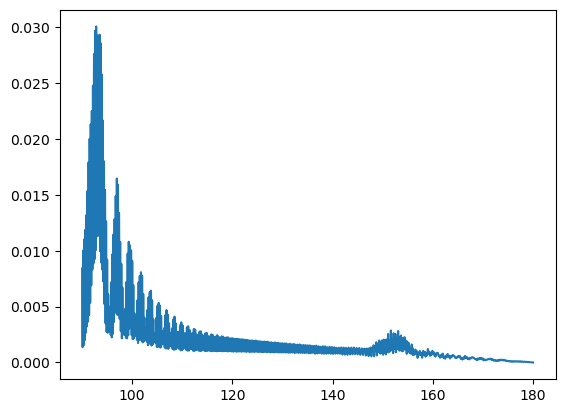

In [12]:
angle = np.linspace(90,180,10000)
Qbb = [scattering_for_eachAngle(theta)/(x**2) for theta in angle]

fig,ax = plt.subplots()
ax.plot(angle,Qbb)

In [19]:
def qbb(D,lambda0=np.linspace(400,800,4),mreal=1.12):

    def n(lambda0,coef1=0.010658,coef2=-0.007186):
        """
        args: 
            lambda (float)(nm) 
            coef1,coef2: parameter for exp
        returns:
            n 複素屈折率の虚部

        """
        return coef1*np.exp(coef2*lambda0)
    
    result = []
    
    #for lambda0 in lambda0:
    x = 2 * np.pi * D /(lambda0*1e-9)
    m = mreal-n(lambda0)*1j

    def scattering_for_eachAngle(theta):
        cos = np.cos(theta)
        sin = np.sin(theta)

        S1,S2 = miepython.mie_S1_S2(m,x,cos,norm="wiscombe")
        i1 = abs(S1) ** 2
        i2 = abs(S2) ** 2
        I  = i1+i2
        return I*sin
    
    integrated,err = integrate.quad(scattering_for_eachAngle,np.pi/2,np.pi,limit=100)
        #result.append(integrated/(x**2))
    result = integrated/(x**2)
    return result

In [20]:
qbb(1e-3,lambda0)

0.001854583445048699

In [18]:
np.cos(np.pi/2)

6.123233995736766e-17